In [ ]:
install.packages('lsa')

## 13.1.3 Describing Networks Using Matrix Algebra

Previously, we introduced the idea of associating a hebbian model of learning and retrieval with linear algebra. Now we will talk about how we can simply rearrange parts of the equation to understand what exactly the model is doing.

We start with a two associations in a weight matrix __W__. $\boldsymbol{c}$ is the 'stimulus' and $\boldsymbol{o}$ is the 'repsonse' the __W__ matrix represents the mappings between the two and $\alpha$ is an item level learning rate.

$$ \boldsymbol{W}=\alpha_1 \boldsymbol{o}_1 \boldsymbol{c}_1^T + \alpha_2 \boldsymbol{o}_2 \boldsymbol{c}_2^T $$ 
Here, the subscripts represent pairs of items rather than elements within vectors. The learning rate can be different for different pairs.

$$ \boldsymbol{v}=(\alpha_1 \boldsymbol{o}_1 \boldsymbol{c}_1^T + \alpha_2 \boldsymbol{o}_2 \boldsymbol{c}_2^T)\boldsymbol{c}_1 $$

The __v__ distinguishes from __W__ because we are now working with outputs, not the weight matrix.

$$ 
\begin{align}
\boldsymbol{v}&=\alpha_1 \boldsymbol{o}_1 \boldsymbol{c}_1^T\boldsymbol{c}_1 + \alpha_2 \boldsymbol{o}_2 \boldsymbol{c}_2^T\boldsymbol{c}_1 \\
&=(\boldsymbol{c}_1^T\boldsymbol{c}_1)\alpha_1 \boldsymbol{o}_1 + (\boldsymbol{c}_2^T\boldsymbol{c}_1)\alpha_2 \boldsymbol{o}_2 
\end{align}
$$

$\boldsymbol{c}_1^T\boldsymbol{c}_1$ and $\boldsymbol{c}_2^T\boldsymbol{c}_1 $ are inner products and produce scalar values and $\alpha$ is also a scalar. Utimately, the ouput vector __v__ is a weighted sum of the original output vectors ($\boldsymbol{o}_1$ and $\boldsymbol{o}_2$) and the two scalar values, $\alpha$ and the dot product between the cue vectors $\boldsymbol{c}_1$ and the original stimulus vectors ($\boldsymbol{c}_1$ and $\boldsymbol{c}_2$).

For the sake of a simple example, we can use extreme values, when cosine between stimulus and cue equals 1 or 0:

If zero, then we get $ \boldsymbol{v}=(\boldsymbol{c}_1^T\boldsymbol{c}_1)\alpha_1 \boldsymbol{o}_1$

If one, then we get $ \boldsymbol{v}=\boldsymbol{c}_1^T\boldsymbol{c}_1(\alpha_1 \boldsymbol{o}_1 + \alpha_2 \boldsymbol{o}_2)$

In the latter case, the weighting of $\boldsymbol{o}_1$ and $\boldsymbol{o}_2$ is only down to $\alpha_1$ and $\alpha_2$ 

From this section, we can see how a cue gets activated or associated with an existing network to produce an output vector. Next, we will go through auto-associators

The $\boldsymbol{v}$ vector is retrieved output given the cue $\boldsymbol{c}_1$.

## 13.1.4 The Auto-Associator

This kind of model associates items with themselves. These models can perform pattern completion when given partial or degraded input. This allows you to posit what the full representation is with partial input.

Single layer serves as both input and output. Here, weights are recurrent connecting with all other units in the network.

$\boldsymbol{W}_ij$ projects from the $j$th unit to the $i$ith unit, so that there are two weights between every pair of units $a$ and $b$: one projecting from $a$ to $b$, and one projecting from $b$ to $a$. For the model we will consider now, there are also self-connections - that is, weights that connect units to themselves. Here, we can continually cycle its activations back through the weights to the units. 

Enter an 8 by 8 *Walsh matrix*. Any pair of rows or columns is orthogonal. All 8 vectors are orthongonal to one another.

$$ \boldsymbol{W} = \alpha_1 \boldsymbol{v}_1\boldsymbol{v}_1^T + \alpha_2 \boldsymbol{v}_2\boldsymbol{v}_2^T + ... \alpha_N \boldsymbol{v}_N\boldsymbol{v}_N^T $$

See picture

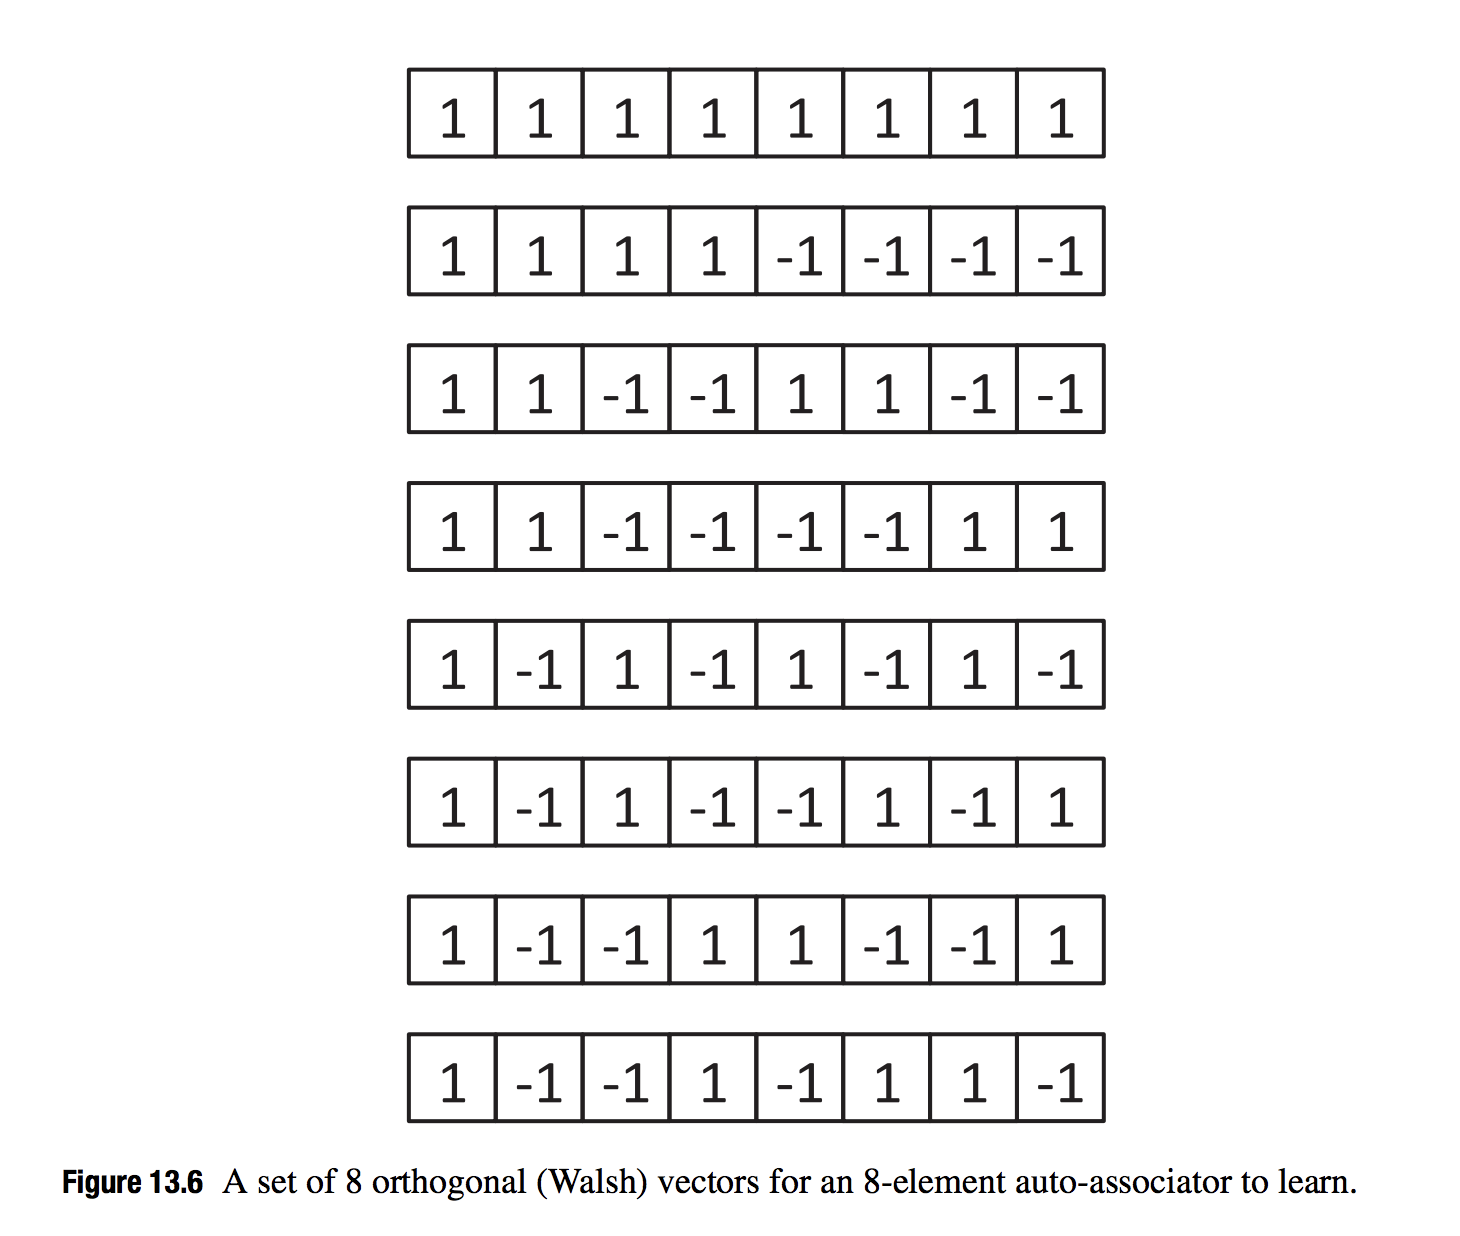

How will the network react when given a corrupted version of itself?

Below is vector $\boldsymbol{u}$(0), which is a mixture - a linear sum - of the learned items. 

**We will later learn how the learned vectors represent the complete set of eigenvectors for this system... Accordingly, any non-zero *u* could necessarily be expressed as a weighted sum of v**

$$\boldsymbol{u}(0)=\sum_k s_k\boldsymbol{v}_k$$

$\boldsymbol{u}$ will change over time as we continually pass the activations from $\boldsymbol{u}$ through the weights in $\boldsymbol{W}$

$$
\begin{aligned}
\boldsymbol{u}(t+1)&=\boldsymbol{W}\boldsymbol{u}(t) \\
&=\sum_i{\alpha_i \boldsymbol{v}_i\boldsymbol{v}_i^T\boldsymbol{u}(t)}
\end{aligned}
$$

Now, we can open up the sum iteration to look at a single $i$.

$$
\begin{aligned}
\alpha_i \boldsymbol{v}_i\boldsymbol{v}_i^T\boldsymbol{u}(t)&=\alpha_i \boldsymbol{v}_i\boldsymbol{v}_i^T\sum_k s_k\boldsymbol{v}_k \\
&=\alpha_i \boldsymbol{v}_i(s_k\boldsymbol{v}_i^T\boldsymbol{v}_i) \\
&=\alpha_i (s_k\boldsymbol{v}_i^T\boldsymbol{v}_i)\boldsymbol{v}_i
\end{aligned}
$$

Step 2 condenses because we know the other units of $\boldsymbol{u}$ are orthogonal to this particular item $\boldsymbol{v}$. That is, when we multiplied $\boldsymbol{v}_i^T$ by anything except $\boldsymbol{v}_i$, we get 0. Accordingly, as shown in last equation above, $\boldsymbol{v}_i$ pulls out a version of itself, scaled by $\alpha_i (s_k\boldsymbol{v}_i^T\boldsymbol{v}_i)$. So, $\boldsymbol{u}(t+1)$ is given by,

$$\boldsymbol{u}(t+1)=\sum_i{\alpha_i (s_k\boldsymbol{v}_i^T\boldsymbol{v}_i)\boldsymbol{v}_i}$$

Each time we pass $\boldsymbol{u}(t)$ through $\boldsymbol{W}$, we end up with a sum of the original vectos, where the weighting of each vector depends upon two factors: $\alpha_i$, the learning rate of that item; and $s_i$, how heavily that item was present in $\boldsymbol{u}(t)$.

The $\boldsymbol{v}$ vectors hold a unique relationship with $\boldsymbol{W}$; they are the *eigenvectors* of the matrix. The eigenvector $\boldsymbol{x}$ of a matrix is a vector such that $\boldsymbol{Ax} = c\boldsymbol{x}$, where $c$ is a scalar. Obviously, there is a lot in that equation that we don't know about...

Eigenvectors and eigenvalues are features of PCA and factor analysis, so yea we know these things. The code below specfies these relationships. 

In [1]:
# walsh matrix
v <- list( 
c(1,1,1,1,1,1,1,1),
c(1,1,1,1,-1,-1,-1,-1),
c(1,1,-1,-1,1,1,-1,-1),
c(1,1,-1,-1,-1,-1,1,1),
c(1,-1,1,-1,1,-1,1,-1),
c(1,-1,1,-1,-1,1,-1,1),
c(1,-1,-1,1,1,-1,-1,1),
c(1,-1,-1,1,-1,1,1,-1)
)
vm <- matrix(1,8,8)

# normalize v
for (i in 1:8){ 
    v[[i]] <- v[[i]] / sqrt( sum(v[[i]] * v[[i]]) ) 
    vm[i,]  <- unlist(v[[i]]) 
}
print(vm, digits=2)

# initialize stuff
alpha<-c(0.9 ,0.8 ,0.7 ,0.6 ,0.5 ,0.4 ,0.3 ,0.2)
n<-8
W<-matrix(rep(0,n*n),nrow=n)

for (i in 1:8) {
    W <- W + alpha[i]*v[[i]]%*%t(v[[i]])
}
print(eigen(W), digits=2)

     [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]
[1,] 0.35  0.35  0.35  0.35  0.35  0.35  0.35  0.35
[2,] 0.35  0.35  0.35  0.35 -0.35 -0.35 -0.35 -0.35
[3,] 0.35  0.35 -0.35 -0.35  0.35  0.35 -0.35 -0.35
[4,] 0.35  0.35 -0.35 -0.35 -0.35 -0.35  0.35  0.35
[5,] 0.35 -0.35  0.35 -0.35  0.35 -0.35  0.35 -0.35
[6,] 0.35 -0.35  0.35 -0.35 -0.35  0.35 -0.35  0.35
[7,] 0.35 -0.35 -0.35  0.35  0.35 -0.35 -0.35  0.35
[8,] 0.35 -0.35 -0.35  0.35 -0.35  0.35  0.35 -0.35
eigen() decomposition
$values
[1] 0.9 0.8 0.7 0.6 0.5 0.4 0.3 0.2

$vectors
      [,1]  [,2]  [,3]  [,4]  [,5]  [,6]  [,7]  [,8]
[1,] -0.35  0.35  0.35  0.35 -0.35  0.35 -0.35  0.35
[2,] -0.35  0.35  0.35  0.35  0.35 -0.35  0.35 -0.35
[3,] -0.35  0.35 -0.35 -0.35 -0.35  0.35  0.35 -0.35
[4,] -0.35  0.35 -0.35 -0.35  0.35 -0.35 -0.35  0.35
[5,] -0.35 -0.35  0.35 -0.35 -0.35 -0.35 -0.35 -0.35
[6,] -0.35 -0.35  0.35 -0.35  0.35  0.35  0.35  0.35
[7,] -0.35 -0.35 -0.35  0.35 -0.35 -0.35  0.35  0.35
[8,] -0.35 -0.35 -0.35  0.35  0.

We basically just proved that the Walsh matrix is a matrix of orthogonal vectors and $\alpha$ is our specified vector of eigenvalues.

Using eigenvalues and vectors, we have a model that allows us to perform auto-association.

If we keep reactivating this model, eventually the activations will grow without bound; which isn't realistic for the brain.

### The Brain-state-in-a-box (BSB) model

This model puts bounds on activations.

Equation wise, it is a continuation from above we just put a wrapper function that puts upper and lower bounds on what the $\boldsymbol{u}$ vector can be. The values are constrained to what they call a hypercube.

Below is code implementing the BSB model, on a classification task. 

The model is shown an ambiguous exemplar.

The model classifies based on similarity to some learned exemplars.

This example uses two orthogonal vectors (A and B - these are the trained stimuli), which are the eigenvectors of $\boldsymbol{W}$.

The authors look at model performance and reevaluate after cueing the model with noisy combinations of the orthogonal vectors.


In [28]:
# learned vectors; in the text, these are named A and B respectively
v<-list(c(1,1,1,1,-1,-1,-1,-1),c(1,1,-1,-1,1,1,-1,-1))
n <- 8             # number of units
maxUpdates <- 100  # maximum number of BSB cycles
inits <- 1         # length of uncorrupted probe vector
tol <- 1e-8       # tolerance for detecting a difference
alpha <- .025      # learning rate
beta <- 1
epsilon <- 1
nReps <- 1000
noiseSet <- c(0,0.1,0.2,0.4,0.5)
startSet <- seq(0,1,length.out=10)
W <- matrix(rep(0,n*n),nrow=n)

#-----------learning
for(i in 1:2){
    W <- W + alpha * v[[i]] %*% t(v[[i]])
}
#-----------test
meanAcc<-{}
meanRT<-{}

# cycle through different noise sets
for(noise in noiseSet){
    
    # initialize empty vector for acc and RT
    tAcc<-rep(0,length(startSet))
    tRT<-rep(0,length(startSet))
    accI<-1
    noise
    # cycle through different combinations of A and B for the cue to the model
    for (startp in startSet){
        # cycle through test cases for this particular cue
        for (rep in 1:nReps){

            # make u a weighted combination of A and B...
            u <- startp*v[[2]] + (1-startp)*v[[1]]

            # ... normalize u ...
            u <- inits * u / sqrt( sum(u^2) )

            # ... and add some Gaussian noise
            u <- u + rnorm(n,0,noise)

            # loop across BSB cycles
            for( t in 1:maxUpdates ){
                # store state of u, we'll need it in a bit to see if it has changed
                ut <- u

                # update u...
                u <- beta*u + epsilon * W%*%u

                # ...and then squash the activations
                u[u > 1] <- 1
                u[u < -1] <- -1

                # did you change on this update cycle? If not, the model
                # has converged and we break out of the
                # updating loop
                if (all(abs(u-ut)<tol)){
                    break }
            }

            # is it an A response?
            if (all(abs(u-v[[1]])<tol)){
                tAcc[accI] <- tAcc[accI]+1
            }
            # also record response time
            tRT[accI]<-tRT[accI]+t
        }
        accI<-accI+1
    }
    # store the results
    meanAcc <- cbind(meanAcc,tAcc/nReps)
    meanRT <- cbind(meanRT,tRT/nReps)
}
pdf(file="BSBresults.pdf",width=9,height=6)
par(mfrow=c(1,2))
matplot(startSet,meanAcc,type="b",lty=1:4,col=1,pch=1:4,
xlab="Starting position",ylab="Proportion 'A' response")
legend(0.7,0.8,legend=noiseSet,lty=1:4,pch=1:4,col=1)
matplot(startSet,meanRT,type="b",lty=1:4,col=1,pch=1:4,
ylim=c(0,20),xlab="Starting position",ylab="Convergence Time")
dev.off()

pdf 
  2

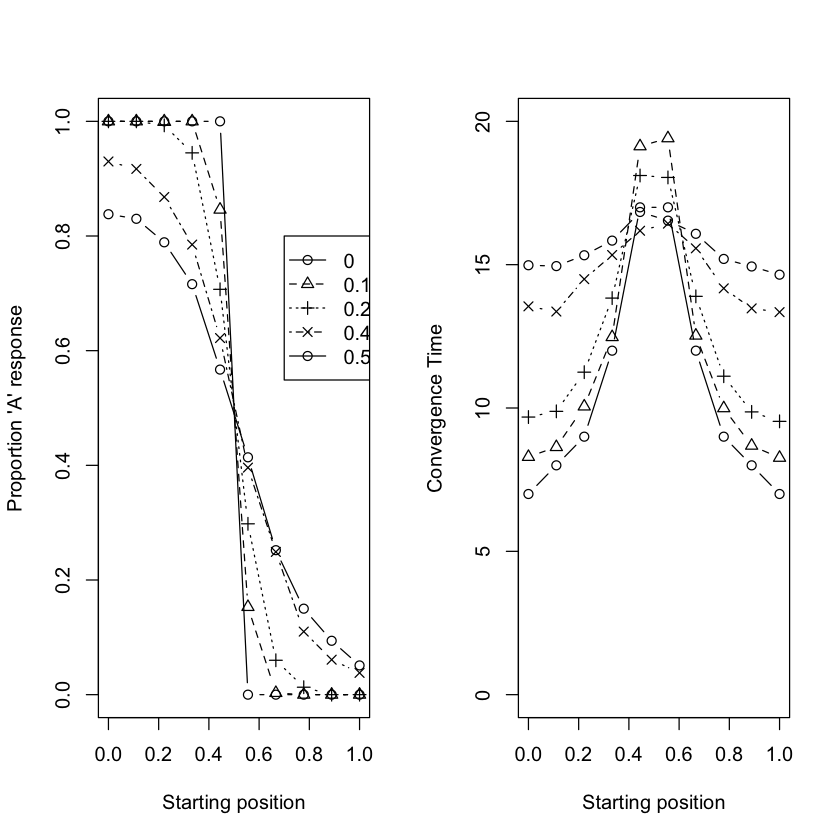

In [30]:
# plot results
par(mfrow=c(1,2))
matplot(startSet,meanAcc,type="b",lty=1:4,col=1,pch=1:4,
xlab="Starting position",ylab="Proportion 'A' response")
legend(0.7,0.8,legend=noiseSet,lty=1:4,pch=1:4,col=1)
matplot(startSet,meanRT,type="b",lty=1:4,col=1,pch=1:4,
ylim=c(0,20),xlab="Starting position",ylab="Convergence Time")